In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../dados_harmonicos.csv')
df = df.replace('i', 'j', regex=True)

display(df)

,Amostras_1,Amostras_2,Amostras_3,Amostras_4,Amostras_5,Amostras_6,Amostras_7,Amostras_8,Amostras_9,Amostras_10,...,Amostras_497,Amostras_498,Amostras_499,Amostras_500,classe,Freq_analisada_Hz,Faixa_Moduladora,Intensidade_db,Canal,voluntario
0,-11.9287104248694-14.875441163193j,-2.63714438278631-14.1628903301632j,9.73905140697886-4.24308876347259j,-3.43817508699753-2.8378860807684j,0.938320862758085+5.95107087382504j,8.34466503900969+1.6684502012175j,8.77886551905124+8.3157768855802j,10.9624002530382+2.01821508312438j,4.19255303664547+5.1380440057899j,8.489090178271+12.2496259592486j,...,-28.9453463142943-21.6304959537416j,-9.19706269084625-4.7768259353937j,9.01423925727307-10.1986834977578j,10.8333209474169+4.1303505528859j,1,33,40,70,Fz,AH
1,5.66665098295756-5.73863696753984j,9.34414941536059-5.20427593084129j,3.3898302601677-11.5270457678019j,3.14738280266078-2.34459462857865j,-7.21764374881923-6.31323753300691j,9.47886518313603+0.200072129045863j,5.08831951684019-5.29782869354779j,16.7717167465448+5.85075431837294j,5.21140736817612-2.50991292686624j,-8.31799871316987-1.95038263571372j,...,-7.77465828570368+6.67007688514336j,-16.3066217132743-1.33421106945253j,15.7168302816696+1.66835119876892j,-8.22206670206577+9.88365693946781j,1,37,40,70,Fz,AH
2,5.03028213137088+3.47361196230173j,-8.13721439651841-1.54700800702243j,-3.49032348809159-6.66477217226851j,-6.31856869684226+1.36460382685254j,-5.21954769011709+1.91627182728754j,10.3586555260325+19.1357487143088j,-3.45204256695516+0.342587220032595j,6.42602420941557+10.2961333905352j,0.497455231380335+3.93198354291971j,8.29572494083051-6.29351136704858j,...,-0.702039368136772-6.47090923634808j,-1.90915569723743+0.038460878155894j,1.87654516838996-3.85444284179093j,-2.53931374086284-8.18505752611262j,1,41,40,70,Fz,AH
3,-2.69437552533651-0.443265571662665j,2.26297505445924-4.32979978993325j,0.878647306471491-1.96030684712897j,11.0077443304137-2.79243994148609j,-14.5506837064631-9.21217511179037j,-1.65928041963358+4.1664351549347j,3.03285429976141-4.5718040583682j,-5.50383427622592+1.18211072326647j,-2.64321560104519+2.31977905364747j,5.15143673656233+7.14796532809706j,...,3.98637655597113+9.47765688816421j,0.997033700699956-9.35423387583864j,-3.36588504598374-9.64001409114187j,1.16062075000301+13.1098799183474j,1,45,40,70,Fz,AH
4,-14.1060396536154-11.9635989992521j,-3.09273257435156-10.5939169051076j,15.1230979200572+9.05970772430038j,-2.7337558296306+11.6971923757082j,-8.03980363779999+4.43023371717983j,-0.446586928611119+2.3003852581034j,5.90963584175537+11.5878523587431j,-5.90589543505183-1.89264297146193j,-5.75710935013775-5.63953389646059j,15.9100049379377+6.03935321543916j,...,-2.7319403539445+0.311077933404636j,-2.75289128653264+7.35270460275029j,17.2120994723809-1.01519107216341j,-12.9170268288462+11.2994210537745j,1,35,40,70,Fz,AH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36427,-5.0737071078554+1.72032679863412j,-0.539014605864759+1.13637855546732j,4.13394660971259-0.138121388105622j,0.0313869559904948+0.310068736168884j,-3.24802527160743+1.4843660946957j,-1.68868362385994-1.48842940293941j,0.700522770778116-2.55405315706674j,-2.66176964421405-0.167157805304496j,-3.25245856858173+2.73398824154305j,2.32907354506859+1.96572310510385j,...,-0.195726602914531-0.174706686339984j,-0.722504066147478+0.00398305279170432j,-0.0934224841023479+0.596997412630031j,0.571885192143587-0.273779896160786j,0,284,80,50,C3,YR
36428,3.08737719393949-2.69755920894245j,1.97713064063035+3.4079467878609j,2.45590484073787+0.724865368786072j,2.96780453021556-1.96561114905103j,-0.391357237599486+4.65686204955065j,1.78029898455087+0.116326747583786j,-2.70977016203882-3.66628566122578j,-4.12623933258891-2.02591968790311j,-0.476559332641357+3.07327262220186j,1.31973739251342-0.270895442890474j,...,0.180166776142092-0.330668674518849j,-1.1444534466246-0.0130871484248901j,-0.210670280029139+0.218867741252382j,-0.418698984960838+0.858802784956105j,0,288,80,50,C3

In [5]:
df.classe.value_counts()

classe
0    27984
1     8448
Name: count, dtype: int64

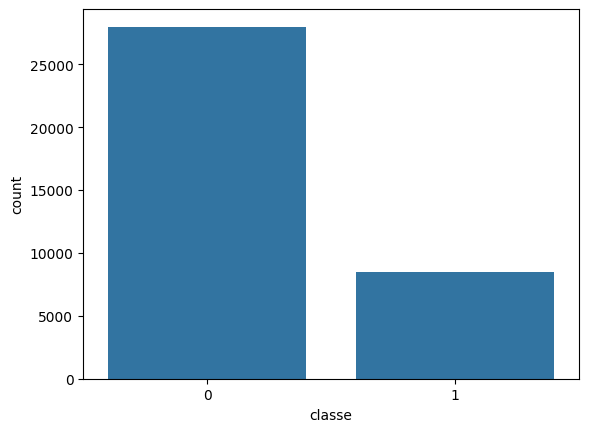

In [6]:
import seaborn as sns

ax = sns.countplot(x='classe', data=df)

In [23]:
y = df['classe']

IndexError: tuple index out of range

In [4]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
36427    0
36428    0
36429    0
36430    0
36431    0
Name: classe, Length: 36432, dtype: int64


In [5]:
X = df.drop(['classe', 
             'Freq_analisada_Hz', 
             'Faixa_Moduladora', 
             'Intensidade_db', 
             'Canal', 
             'voluntario'], axis=1)


In [8]:
X.columns = range(X.shape[1]) #Remove o Header

In [10]:
complex_columns = X.columns
X[complex_columns] = X[complex_columns].map(lambda x: complex(x))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [12]:
X_train_rec = X_train.copy()
X_train = np.abs(X_train)

X_test_rec = X_test.copy()
X_test = np.abs(X_test)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}

model_svm = SVC()

grid_svm = GridSearchCV(model_svm, param_grid, cv=10, scoring='roc_auc_score')

grid_svm.fit(X_train, y_train)

SVC()

In [ ]:
best_params_svm = grid_svm.best_params_
best_score_svm = grid_svm.best_score_

In [ ]:
final_model_svm = SVC(
    C= best_params_svm['C'],
    kernel= best_params_svm['kernel'],
    gamma= best_params_svm['gamma']
)

final_model_svm.fit(X_train, y_train)

In [17]:
from sklearn import metrics

y_pred = final_model_svm.predict(X_test)

acc_svm = metrics.accuracy_score(y_test, y_pred)

print(acc_svm)

0.7676684506655688


In [18]:
print(pd.crosstab(y_test,y_pred, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

Previsão     0  1   All
Real                   
0         5594  3  5597
1         1690  0  1690
All       7284  3  7287 
[[5594    3]
 [1690    0]]


In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.4997319992853314

In [21]:
from sklearn.metrics import roc_curve

fpr_rna, tpr_rna, threshold = roc_curve(y_test, y_pred)

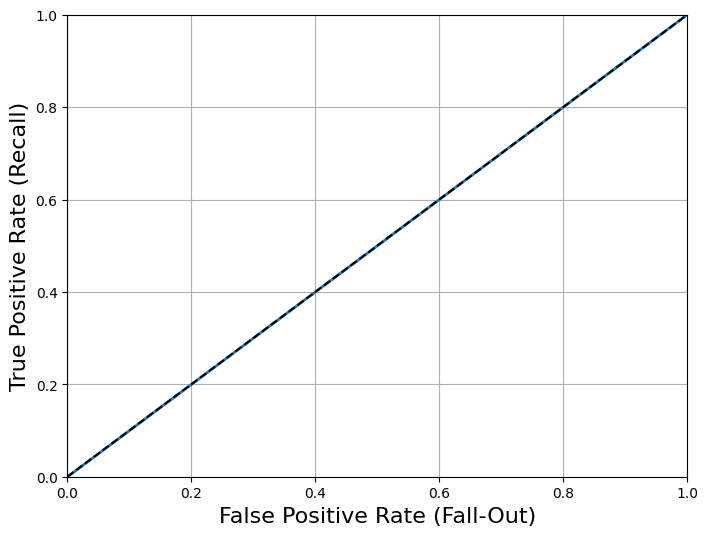

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_rna, tpr_rna)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

### SGD

In [ ]:
from sklearn.linear_model import SGDClassifier


param_grid_sgd = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 20, 100],
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],

}

model_sgd = SGDClassifier()

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv=10, scoring='roc_auc_score')
grid_sgd.fit(X_train, y_train)

In [ ]:
best_params_sgd = grid_sgd.best_params_
best_score_sgd = grid_sgd.best_score_

In [ ]:
final_model_sgd = SGDClassifier(
    alpha= best_params_sgd['C'],
    loss= best_params_sgd['kernel'],
)

final_model_sgd.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

y_pred_sgd = final_model_svm.predict(X_test)

acc_sgd = metrics.accuracy_score(y_test, y_pred_sgd)

print(acc_sgd)

In [ ]:
print(pd.crosstab(y_test,y_pred_sgd, rownames=['Real'], colnames=['Previsão'], margins=True),'')

from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_test,y_pred_sgd)

print(cm_sgd)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_sgd)

In [ ]:
from sklearn.metrics import roc_curve

fpr_rna, tpr_rna, threshold = roc_curve(y_test, y_pred_sgd)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr_rna, tpr_rna)
#fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
#plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
#plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
#plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()